<a href="https://colab.research.google.com/github/Chuyini/Modelo-polinomicos-/blob/main/IntentoTarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split;
from google.colab import files;
NoLinearData= files.upload();

TypeError: ignored

In [ ]:
import pandas as pd;
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_errorD


In [ ]:
data= pd.read_csv("NewDataset.csv")

In [ ]:
data

In [ ]:
pairs_of_data_level3 = []

In [ ]:
for column in data.columns:# here we split all the dataset in pairs X with A1,2,3...n
    if column.startswith('A'):
        par_de_datos = data[['X', column]].values#here it splits in pairs X wit cont
        pairs_of_data_level3.append(par_de_datos)

In [ ]:
from tensorflow.python.ops.gen_math_ops import Xdivy
from re import X


print(pairs_of_data_level3[0][:,0]);

X=pairs_of_data_level3[0][:,0]
y=pairs_of_data_level3[0][:,1]

[ 0.    2.12  3.06  4.16  4.93  6.09  6.57 12.72 18.95 20.2  26.32 26.58
 28.48 28.91 29.71 31.44 31.65 37.52 38.66 39.98 41.01 41.92 43.08 48.78
 50.  ]


In this part, I am going to do the main function. For any pairs of data with "X" and "An" I am going to do splines method,  furier method, kernel method and Least Squares Method and then I am going to plot them in a single graph



---



Splines

In [ ]:
def fiting_spline(x, y):# the function
    spline = UnivariateSpline(x, y, k=5)  # k=3 for spline cúbic
    return spline

MAIN

In [ ]:
cont=1
mse=[]

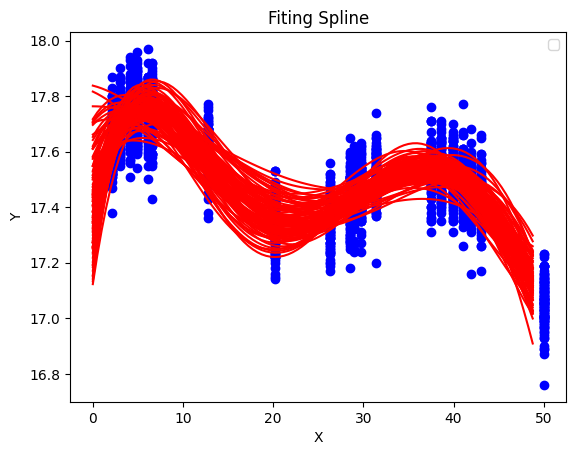

MSE: 0.026655237197452535


In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Fiting Spline')

for par_de_datos in pairs_of_data_level3:

  X=par_de_datos[:,0]
  y=par_de_datos[:,1]

  #SPLINES

  #First I must split the data for training an Testing
  Xtraining, Xtest, Ytraining,Ytest=train_test_split(X,y,test_size=0.20, random_state=42)

  #Splines required the dataset to be order
  sorted_indices = np.argsort(Xtraining)
  Xtraining = Xtraining[sorted_indices]
  Ytraining = Ytraining[sorted_indices]
  #Here I use the function

  #Training
  spline1=fiting_spline(Xtraining,Ytraining)
  #testing
  x_eval = np.linspace(min(Xtest), max(Xtest), 100)
  y_eval = spline1(x_eval)

  # Plotting the graph

  ax.scatter(Xtraining, Ytraining,  color='blue')#label='Datos Originales',
  ax.plot(x_eval, y_eval,  color='red')#label='Spline Ajustado',
  #The error
  mse = np.mean((spline1(Xtest) - Ytest) ** 2)


ax.legend()
plt.show()


print(f'MSE: {mse}')





---



Least Squares


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Fitting Spline')

# Loop through pairs of data in pairs_of_data_level3
for par_de_datos in pairs_of_data_level3:
    X = par_de_datos[:, 0]
    y = par_de_datos[:, 1]

    # Polynomial fitting
    degree = 3  # Degree of the polynomial
    coeffs = np.polyfit(X, y, degree)
    polynomial_fitting = np.poly1d(coeffs)

    # Split the data into training and testing sets
    Xtraining, Xtest, Ytraining, Ytest = train_test_split(X, y, test_size=0.20, random_state=42)

    # Polynomial fitting on the training data only
    coeffs_train = np.polyfit(Xtraining, Ytraining, degree)
    polynomial_fitted_train = np.poly1d(coeffs_train)

    # Calculate the fitted values for all X points in the training set
    values_fitted_train = polynomial_fitted_train(Xtraining)

    # Calculate the fitted values for all X points in the testing set
    values_fitted_test = polynomial_fitted_train(Xtest)

    # Calculate the mean squared error for the testing set
    mse = mean_squared_error(Ytest, values_fitted_test)

    # Plot original data points and fitted lines for both training and testing sets
    plt.scatter(Xtraining, Ytraining, label=f'Training Data (MSE={mse:.2f})', color='blue')
    plt.scatter(Xtest, Ytest, label='Testing Data', color='green')
    x_eval = np.linspace(min(X), max(X), 100)
    y_eval = polynomial_fitting(x_eval)
    plt.plot(x_eval, y_eval, label=f'Polynomial Fitting (Degree {degree})', color='red')

# Add a legend to the plot
ax.legend()
plt.show()



---



FUrier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Fourier Fitting')

for par_de_datos in pairs_of_data_level3:
    X = par_de_datos[:, 0]
    y = par_de_datos[:, 1]

    # Fourier fitting
    n_harmonics = 2  # Number of harmonics to use in the Fourier series
    N = len(X)  # Number of data points

    # Create a matrix to hold the Fourier basis functions
    fourier_basis = np.zeros((N, 2 * n_harmonics + 1))
    for i in range(n_harmonics + 1):
      fourier_basis[:, 2 * i] = np.cos(2 * np.pi * i * X / X.max())
      if i > 0 and 2 * i + 1 < 2 * n_harmonics + 1:
        fourier_basis[:, 2 * i + 1] = np.sin(2 * np.pi * i * X / X.max())

    # Fit the data using linear regression
    coeffs, residuals, rank, s = np.linalg.lstsq(fourier_basis, y, rcond=None)

    # Calculate the fitted values using the Fourier basis functions
    fitted_values = np.dot(fourier_basis, coeffs)

    # Calculate the mean squared error
    mse = mean_squared_error(y, fitted_values)

    # Plot original data and the Fourier fitting
    plt.scatter(X, y, label=f'Data (MSE={mse:.2f})', color='blue')
    plt.plot(X, fitted_values, label=f'Fourier Fitting (Harmonics {n_harmonics})', color='red')

# Add a legend to the plot
ax.legend()
plt.show()





---



Kernel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

# Create a plot
fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Kernel Ridge Regression')

# Loop through pairs of data
for par_de_datos in pairs_of_data_level3:
    X = par_de_datos[:, 0]
    y = par_de_datos[:, 1]

    # Kernel Ridge Regression
    kernel = 'rbf'  # Type of kernel, in this case, the radial kernel (Gaussian)
    alpha = 1.0  # Regularization parameter

    # Create a Kernel Ridge Regression model
    model = KernelRidge(alpha=alpha, kernel=kernel)
    model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    # Predict the fitted values
    y_pred = model.predict(X.reshape(-1, 1))

    # Calculate the mean squared error
    mse = mean_squared_error(y, y_pred)

    # Plot the original data and the Kernel Ridge fit
    plt.scatter(X, y, label=f'Data (MSE={mse:.2f})', color='blue')
    plt.plot(X, y_pred, label=f'Kernel Ridge (Kernel={kernel}, Alpha={alpha})', color='red')

# Add a legend to the plot
ax.legend()
plt.show()



In [ ]:
a, b, c, d = coefficients

# Imprimir los coeficientes
print(f"Coeficiente a: {a}")
print(f"Coeficiente b: {b}")
print(f"Coeficiente c: {c}")
print(f"Coeficiente d: {d}")

Coeficiente a: -4.5641003022493286e-05
Coeficiente b: 0.0035952075516175646
Coeficiente c: -0.08360516863950002
Coeficiente d: 17.99989994036833


predicction

In [ ]:

Yprediccion = a * Xprueba**3 + b * Xprueba**2 + c * Xprueba + d
print("Predicciones en los datos de prueba:")
print(Yprediccion)

Predicciones en los datos de prueba:
[17.39604334 17.50817069 17.99989994 17.17877735 17.46059822]


In [ ]:
mse = mean_squared_error(Yprueba, Yprediccion)

# Imprime el valor del MSE
print(f"Error Cuadrático Medio (MSE): {mse}")

Error Cuadrático Medio (MSE): 0.037277441757784746


In [ ]:
a, b, c, d = coefficients
x_grafica = np.linspace(min(Xentrenamiento), max(Xentrenamiento), 100)
y_grafica = a * x_grafica**3 + b * x_grafica**2 + c * x_grafica + d

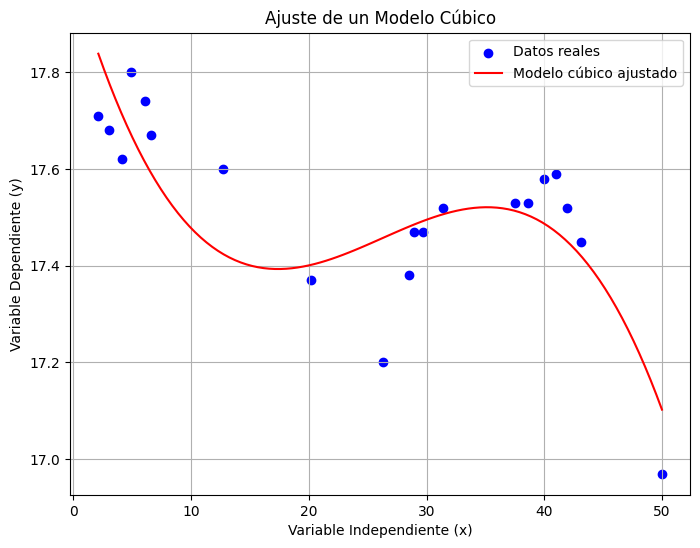

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Xentrenamiento, Yentrenamiento, label="Datos reales", color="blue")
plt.plot(x_grafica, y_grafica, label="Modelo cúbico ajustado", color="red")
plt.xlabel("Variable Independiente (x)")
plt.ylabel("Variable Dependiente (y)")
plt.title("Ajuste de un Modelo Cúbico")
plt.legend()
plt.grid(True)
plt.show()

I am going to import the tensorflow library for to make a neural-network, just for entraing

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Bulding the dataset.

In [ ]:
entrada=np.array([1,6,30,7,70,43,505,201,1005,99],dtype=float);
resultados=np.array([0.0254,0.1524,0.762,0.1778,1.778,1.0922,12.776,5.1054,25.527,2.514],dtype= float)

Then we chosee the model


In [ ]:
capa1=tf.keras.layers.Dense(units=1, input_shape=[1])

Creating the kind of network

In [ ]:
modelo=tf.keras.Sequential([capa1])


Assing the optimazier

In [ ]:

modelo.compile(

    optimizer=tf.keras.optimizers.Adam(0.1),

    loss='mean_squared_error')



In [ ]:
print("Entrenando la red")
entrenamiento=modelo.fit(entrada,resultados, epochs=500, verbose=False)
print("Terminamos")

Entrenando la red
Terminamos


In [ ]:
modelo.save("redNeuronal.h5")
modelo.sabe_weights("pesos.h5")

In [ ]:
#prediccion

i=input("Ingresar el valor en pulgadas: ")
i=float(i)
prediccion=modelo.predict([i]);

print("Prediccion: ",str(prediccion))



Ingresar el valor en pulgadas: 800
1/1 [==============================] - 0s 39ms/step
Prediccion:  [[20.30476]]
